In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
plt.rcParams['axes.unicode_minus'] = False 


In [3]:

path = '../dataset/raw/ml-32m/'


try:
    movies_df = pd.read_csv(path + 'movies.csv')
    ratings_df = pd.read_csv(path + 'ratings.csv')
    print("데이터 파일 불러오기 성공!")
except FileNotFoundError:
    print(f"Error: '{path}' 경로에 데이터 파일이 없습니다. 경로를 확인해주세요.")

데이터 파일 불러오기 성공!


In [7]:
# movie data

print(len(movies_df))
movies_df.head()

87585


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies_df.describe()

,movieId
count,87585.000000
mean,157651.365519
std,79013.402099
min,1.000000
25%,112657.000000
50%,165741.000000
75%,213203.000000
max,292757.000000


In [9]:
# rating data

print(len(ratings_df))
ratings_df.head()

32000204


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [11]:
ratings_df.describe

<bound method NDFrame.describe of           userId  movieId  rating   timestamp
0              1       17     4.0   944249077
1              1       25     1.0   944250228
2              1       29     2.0   943230976
3              1       30     5.0   944249077
4              1       32     5.0   943228858
...          ...      ...     ...         ...
32000199  200948    79702     4.5  1294412589
32000200  200948    79796     1.0  1287216292
32000201  200948    80350     0.5  1294412671
32000202  200948    80463     3.5  1350423800
32000203  200948    87304     4.5  1350423523

[32000204 rows x 4 columns]>

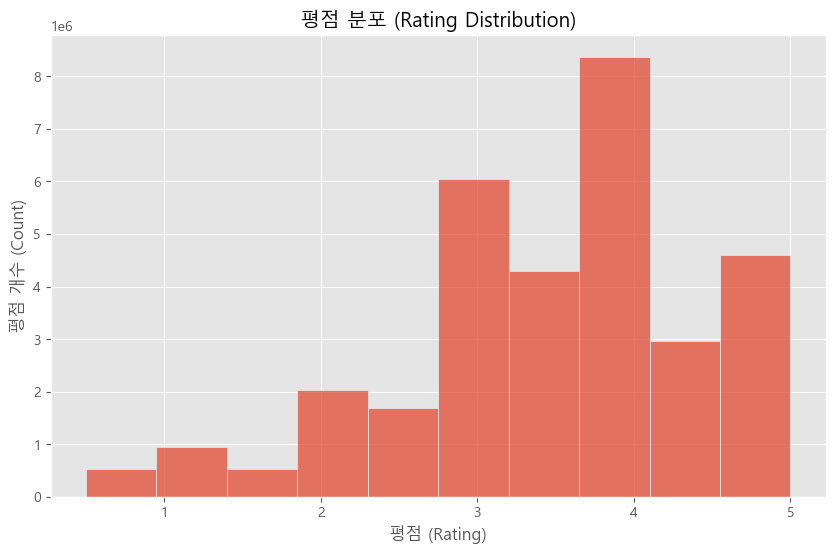

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False)
plt.title('평점 분포 (Rating Distribution)')
plt.xlabel('평점 (Rating)')
plt.ylabel('평점 개수 (Count)')
plt.show()

C:\Users\SyngyeonTak\AppData\Local\Temp\ipykernel_9340\1422622202.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_year_df['year'] = pd.to_numeric(movies_with_year_df['year'])


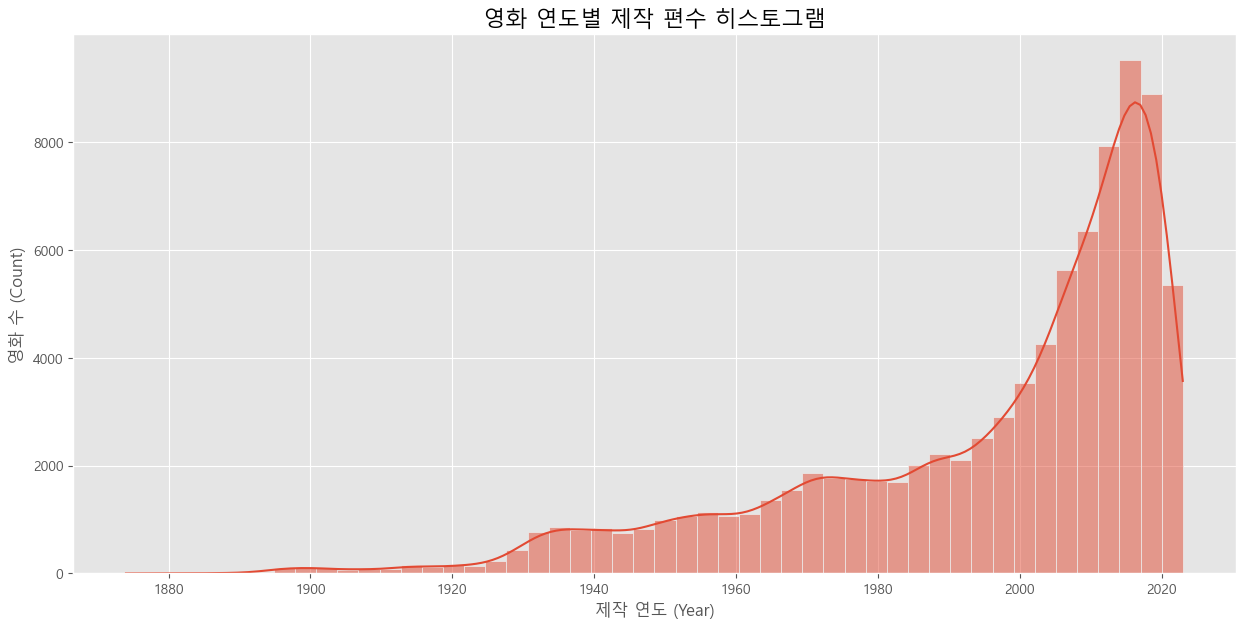

In [15]:
# 연도별 영화 분포

import seaborn as sns
import re

movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)
movies_with_year_df = movies_df.dropna(subset=['year'])
movies_with_year_df['year'] = pd.to_numeric(movies_with_year_df['year'])


plt.figure(figsize=(15, 7))
sns.histplot(data=movies_with_year_df, x='year', bins=50, kde=True)

plt.title('영화 연도별 제작 편수 히스토그램', fontsize=16)
plt.xlabel('제작 연도 (Year)', fontsize=12)
plt.ylabel('영화 수 (Count)', fontsize=12)
plt.grid(True) # 그리드 라인 추가
plt.show()